In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import cmath
from numpy import *
from numpy.linalg import inv
from scipy.fftpack import fft, ifft, dct, idct
from scipy.io import wavfile
from IPython.display import Audio
from scipy.io.wavfile import write

In [2]:
fs, audio = wavfile.read('audio.wav')
Audio('audio.wav')

Audio Type: int16
Samples = 44100   Channels = 2
Sampling frequency = 44100 Hz
Audio length: 1000 mili-seconds


Text(0,0.5,'Amplitude')

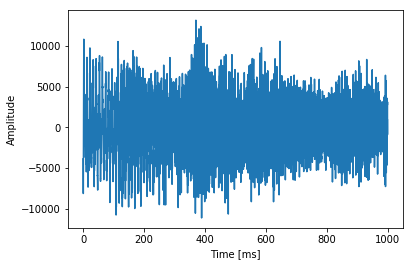

In [3]:
#Signal read from audio file
print(f"Audio Type: {audio.dtype}")
print(f"Samples = {audio.shape[0]}   Channels = {audio.shape[1]}")
print(f"Sampling frequency = {fs} Hz")

audio = audio.T[0]
samples = audio.shape[0]
L = (samples / fs)*1000
print(f'Audio length: {L:.0f} mili-seconds')

f, ax = plt.subplots()
ax.plot((np.arange(samples) / fs)*1000, audio)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Amplitude')

In [4]:
#Input sequence 
audio

array([-3874, -3896, -3981, ...,  3122,  3074,  2829], dtype=int16)

In [5]:
#finding DCT of input sequence 
X_dct = dct(audio)
#DCT of sequence 
X_dct

array([ 6.62640000e+05,  7.13015291e+05,  1.90733798e+05, ...,
       -1.21801775e+01, -2.29180387e+01, -7.43880995e+01])

40100


Text(0,0.5,'Amplitude')

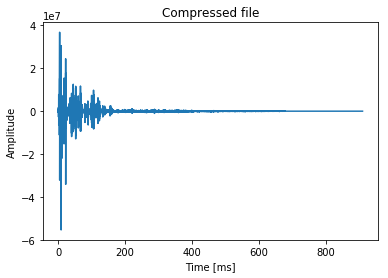

In [6]:
#Energy Compaction
M = 4000   #number of points to geting deleted 
N = len(audio)
#compact DCT sequence
X_m_dct = X_dct[:(N-M)]
print (len(X_m_dct))
plt.plot((np.arange(len(X_m_dct)) / fs)*1000, X_m_dct)
plt.title('Compressed file')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')

In [7]:
#Storing the compact dct sequence in text file format along with value of N and M 
p = b = np.array([N, M]) 
filename = "dct_text.txt"
with open(filename,"w") as f:
    f.write("\n".join(" ".join(map(str, x)) for x in (X_m_dct,p)))
    f.close()
#file is saved with dct sequence and along with parameter N and M

In [8]:
#Reading the text file to get back dct seuence and parameter
filename = "dct_text.txt"
list_of_lists = []
with open(filename,"r") as f:
    for line in f:
        inner_list = [float(elt.strip()) for elt in line.split(' ')]
        list_of_lists.append(inner_list)
dct_m_retrived = list_of_lists[0]
N = int(list_of_lists[1][0])
M = int(list_of_lists[1][1])
print (len(dct_m_retrived))  #printing length of retrived dct
print (M,N) # the retured parameter
#file is saved with dct sequence and along with parameter N and M

40100
4000 44100


In [9]:
#Adding Zero Padding to retrived dct
for i in range(N-M,N):
    dct_m_retrived.append(0)
print(len(dct_m_retrived))

44100


In [10]:
#finding the IDCT of retrived dct sequence
x_m = idct(dct_m_retrived)/(2*len(dct_m_retrived))

In [11]:
#printing the final obtained sequence
x_m

array([-3873.98621948, -3896.04062326, -3980.93464348, ...,
        3122.85182097,  3073.47109648,  2829.1793235 ])

In [12]:
#printing the original sequence
audio

array([-3874, -3896, -3981, ...,  3122,  3074,  2829], dtype=int16)

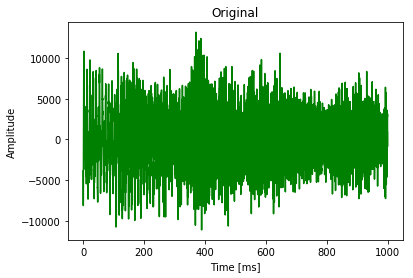

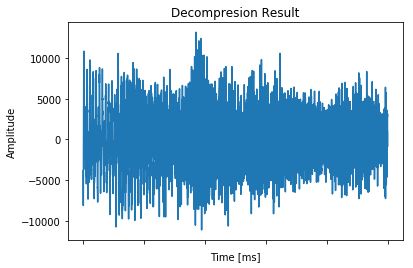

In [13]:
#ploting the final obtained sequence
plt.figure(1)
plt.plot((np.arange(samples) / fs)*1000, audio,'g')
plt.title('Original')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.figure(2)
plt.plot((np.arange(samples) / fs)*1000, x_m)
plt.title('Decompresion Result')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
ax = plt.gca()
ax.set_xticklabels([])
plt.show()